# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [119]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [120]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
type(mapbox_token)

str

# Import Data

In [121]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [74]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


<BarContainer object of 7 artists>

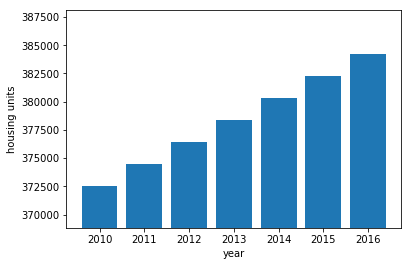

In [122]:
housing_units_py= sfo_data['housing_units'].groupby('year').mean()
average_rent= sfo_data['gross_rent'].groupby('year').mean()
average_sales_price = sfo_data['sale_price_sqr_foot'].groupby('year').mean()
grouped_neighborhood=sfo_data.groupby('neighborhood')
grouped_sales= grouped_neighborhood['sale_price_sqr_foot'].mean()



# Define Panel Visualization Functions
units_min= housing_units_py.min()
units_max= housing_units_py.max()
def housing_units_per_year():
    start= units_min
end = units_max
step_size = housing_units_py.std()
housing_units_py = plt.bar(
    housing_units_py.index, housing_units_py,)
lat="latitude",
lon="longitude",
color="index",
color_continuous_scale=px.colors.cyclical.IceFire,
title="Housing Units",

plt.xlabel('year')
plt.ylabel('housing units')
plt.ylim(units_min * .99, units_max * 1.01)
return housing_units_py

In [66]:
grouped_sales.head()

neighborhood
Alamo Square       366.020712
Anza Vista         373.382198
Bayview            204.588623
Bayview Heights    590.792839
Bernal Heights     576.746488
Name: sale_price_sqr_foot, dtype: float64

In [109]:
plt.bar(average_rent

KeyError: -1

In [113]:
    #"""Housing Units Per Year."""
    
    # YOUR CODE HERE!

    


def average_gross_rent():
    #"""Average Gross Rent in San Francisco Per Year."""
        rent_plot = average_rent.plot
        x="average rent"
        y="year"
        title="Average gross rent "
        return rent_plot
    # YOUR CODE HERE!

In [96]:
average_sales_price.head()

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
Name: sale_price_sqr_foot, dtype: float64

In [227]:
def average_sales_price():
    #"""Average Sales Price Per Year."""
    sales_plot= average_sales_price.hvplot.bar(x='year', y='sale_price_sqr_foot', height=600)
    
    plt.xlabel('Year')
    plt.ylabel('Average sale price')
    title="Average Sales Price per year"
    
    return sales_plot
    
    
    # YOUR CODE HERE!

In [228]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    average_neighborhood= px.scatter(grouped_sales, x='neighborhood', y='sale_price_sqr_foot')
    return average_neighborhood
    # YOUR CODE HERE!

In [229]:
neighborhood_df = sfo_data.groupby(["neighborhood"]).mean()
neighborhood_df.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [230]:
sorted_spsf = neighborhood_df.sort_values(by=['sale_price_sqr_foot'], ascending=False)
most_expensive = sorted_spsf[:10]
avg_values=neighborhood_df.groupby('neighborhood').mean().round(2)
avg_values.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.02,378401.0,2817.29
Anza Vista,373.38,379050.0,3031.83
Bayview,204.59,376454.0,2318.40
Bayview Heights,590.79,382295.0,3739.00
Bernal Heights,576.75,379374.5,3080.33


In [231]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    plot_expensive= most_expensive.hvplot.bar(x='neighborhood', y='sale_price_sqr_foot', title='Top 10 Most Expensive Neighborhooods in San Francisco',height=700, rot=45)
    return plot_expensive

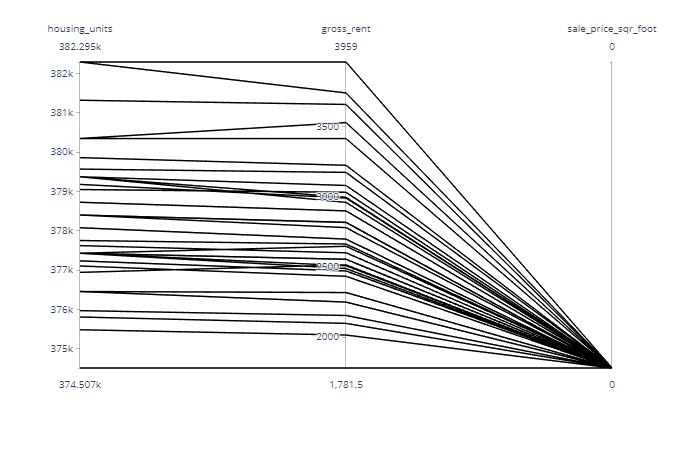

In [193]:

px.parallel_coordinates(avg_values[['housing_units', 'gross_rent', 'sale_price_sqr_foot']], color='sale_price_sqr_foot')

In [232]:
    # YOUR CODE HERE!


def parallel_coordinates():
    parallel = px.parallel_coordinates(avg_values[['housing_units', 'gross_rent', 'sale_price_sqr_foot']], color='sale_price_sqr_foot')      
    return parallel
   
    # YOUR CODE HERE!

IndentationError: expected an indented block (<ipython-input-232-a13e1f319583>, line 5)

In [234]:
def parallel_categories():
   
    parallel_categories_plot = px.parallel_coordinates(most_expensive[['Neighborhood', 'housing_units', 'gross_rent', 'sale_price_sqr_foot']], color='sale_price_sqr_foot')
    return parallel_categories_plot
    # YOUR CODE HERE!
    


def neighborhood_map():
    plot_map= px.set_mapbox_access_token(mapbox_token)
map = px.scatter_mapbox(
    complete_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name="Neighborhood",
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
)
map.show()
    
    # YOUR CODE HERE!

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [237]:
parallel_plots = pn.Column(parallel_categories(), parallel_coordinates())

KeyError: "['Neighborhood'] not in index"

In [242]:
# YOUR CODE HERE!
housing_aggregate = pn.Column(housing_units_per_year, average_gross_rent, average_sales_price)

AttributeError: 'function' object has no attribute 'hvplot'

In [240]:
dashboard= pn.Tabs(('Housing Data', housing_aggregate),('Parallels', parallel_plots ) )

NameError: name 'housing_aggregate' is not defined

## Serve the Panel Dashboard

In [238]:
dashboard.servable()

NameError: name 'dashboard' is not defined